[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                 AAPL      GOOGL       AMZN        MSFT       TSLA  \
Date                                                                 
2020-01-02  73.152641  68.433998  94.900497  154.779541  28.684000   
2020-01-03  72.441460  68.075996  93.748497  152.852234  29.534000   
2020-01-06  73.018692  69.8905

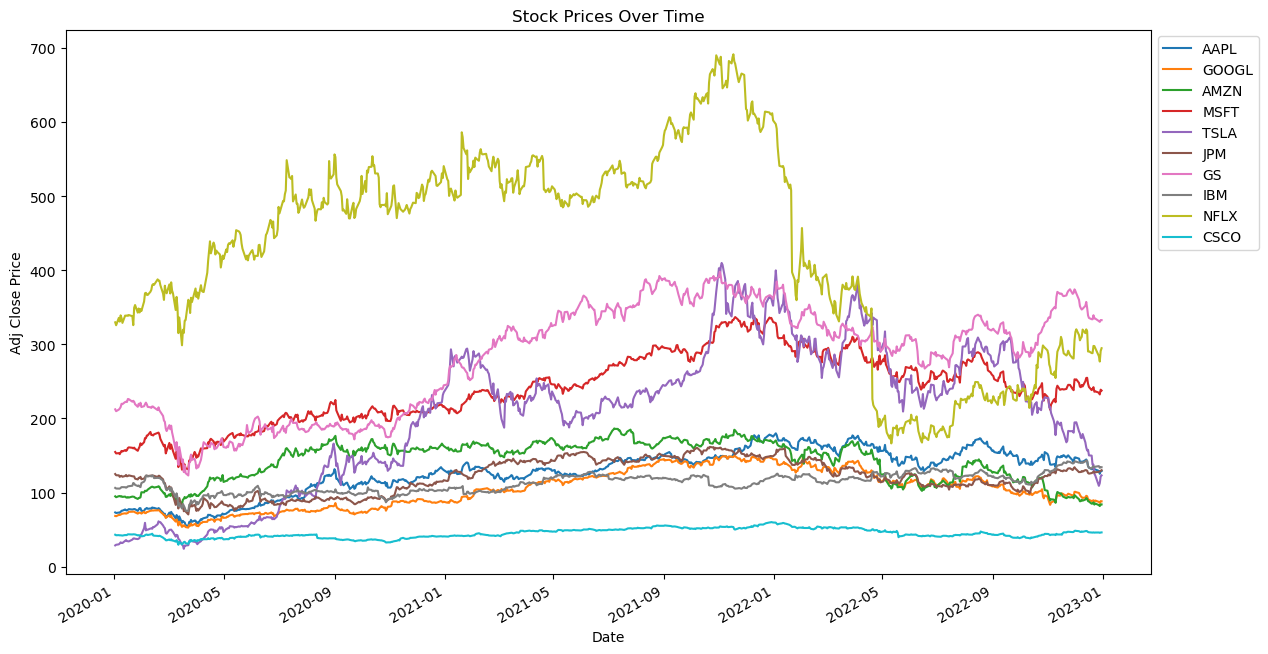

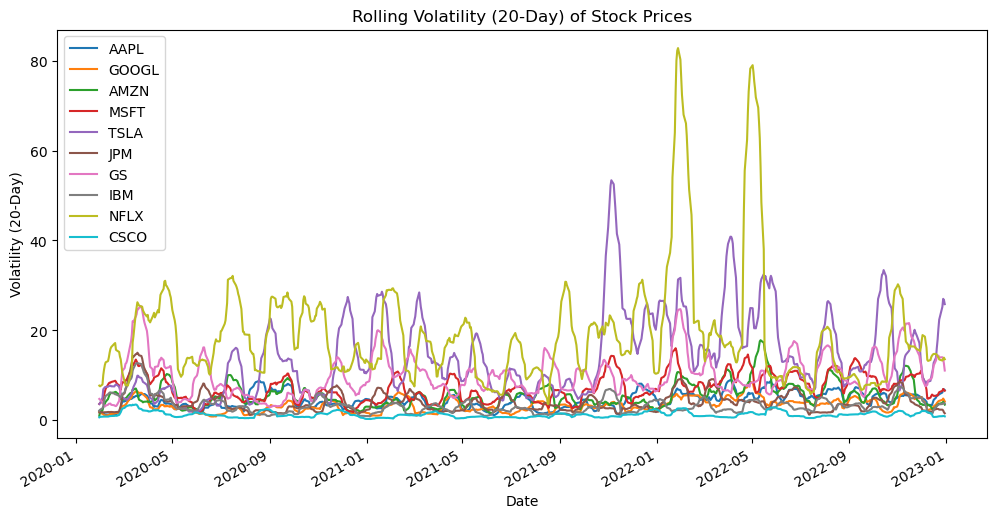

                AAPL     GOOGL      AMZN      MSFT      TSLA       JPM  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.009722 -0.005231 -0.012139 -0.012452  0.029633 -0.013197   
2020-01-06  0.007968  0.026654  0.014886  0.002585  0.019255 -0.000795   
2020-01-07 -0.004703 -0.001932  0.002092 -0.009118  0.038801 -0.017001   
2020-01-08  0.016086  0.007118 -0.007809  0.015929  0.049205  0.007801   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.002798  0.016750  0.017425  0.002267 -0.017551  0.004745   
2022-12-27 -0.013878 -0.020621 -0.025924 -0.007414 -0.114089  0.003504   
2022-12-28 -0.030685 -0.015677 -0.014692 -0.010255  0.033089  0.005465   
2022-12-29  0.028324  0.028249  0.028844  0.027630  0.080827  0.005738   
2022-12-30  0.002469 -0.002487 -0.002138 -0.004938  0.011164  0.006606   

                  GS       IBM      N

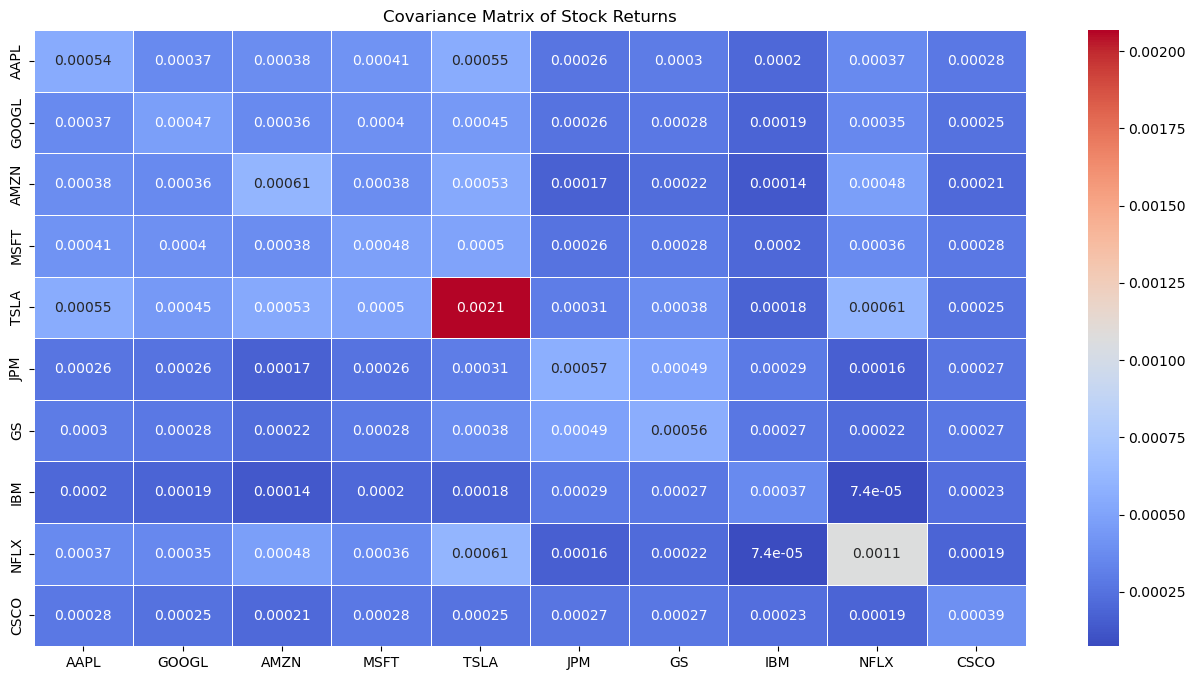

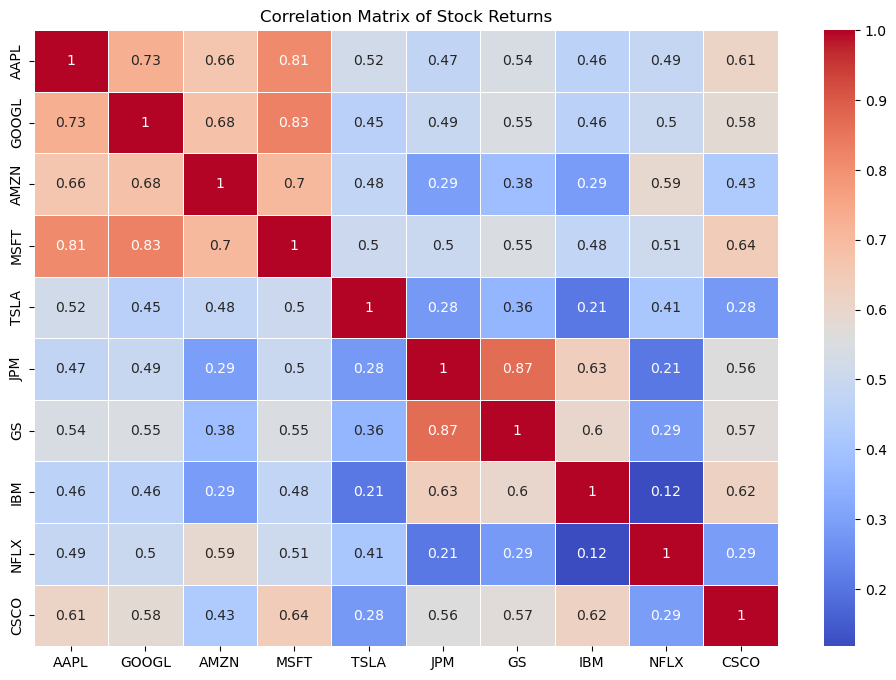

[*********************100%%**********************]  1 of 1 completed
AAPL     15220.248718
GOOGL    14085.683873
AMZN      8395.308981
MSFT     25140.514795
TSLA     47165.551754
JPM      11342.173400
GS       37527.473781
IBM       4475.077098
NFLX     17312.530479
CSCO      3032.840802
dtype: float64
AAPL     0.050098
GOOGL    0.046364
AMZN     0.027634
MSFT     0.082752
TSLA     0.155249
JPM      0.037334
GS       0.123524
IBM      0.014730
NFLX     0.056985
CSCO     0.009983
dtype: float64
[*********************100%%**********************]  1 of 1 completed
0.007863108490725546
0.03468781191028411
Stock: AAPL
Beta: 0.0501
Expected Return (CAPM): 0.0092

Stock: GOOGL
Beta: 0.0464
Expected Return (CAPM): 0.0091

Stock: AMZN
Beta: 0.0276
Expected Return (CAPM): 0.0086

Stock: MSFT
Beta: 0.0828
Expected Return (CAPM): 0.0101

Stock: TSLA
Beta: 0.1552
Expected Return (CAPM): 0.0120

Stock: JPM
Beta: 0.0373
Expected Return (CAPM): 0.0089

Stock: GS
Beta: 0.1235
Expected Return (CAPM): 0.

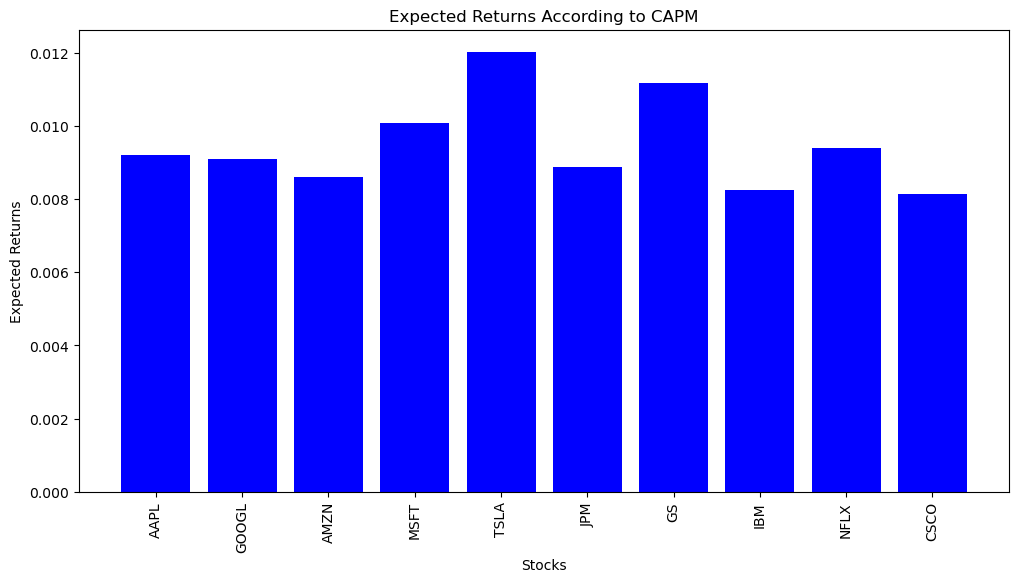

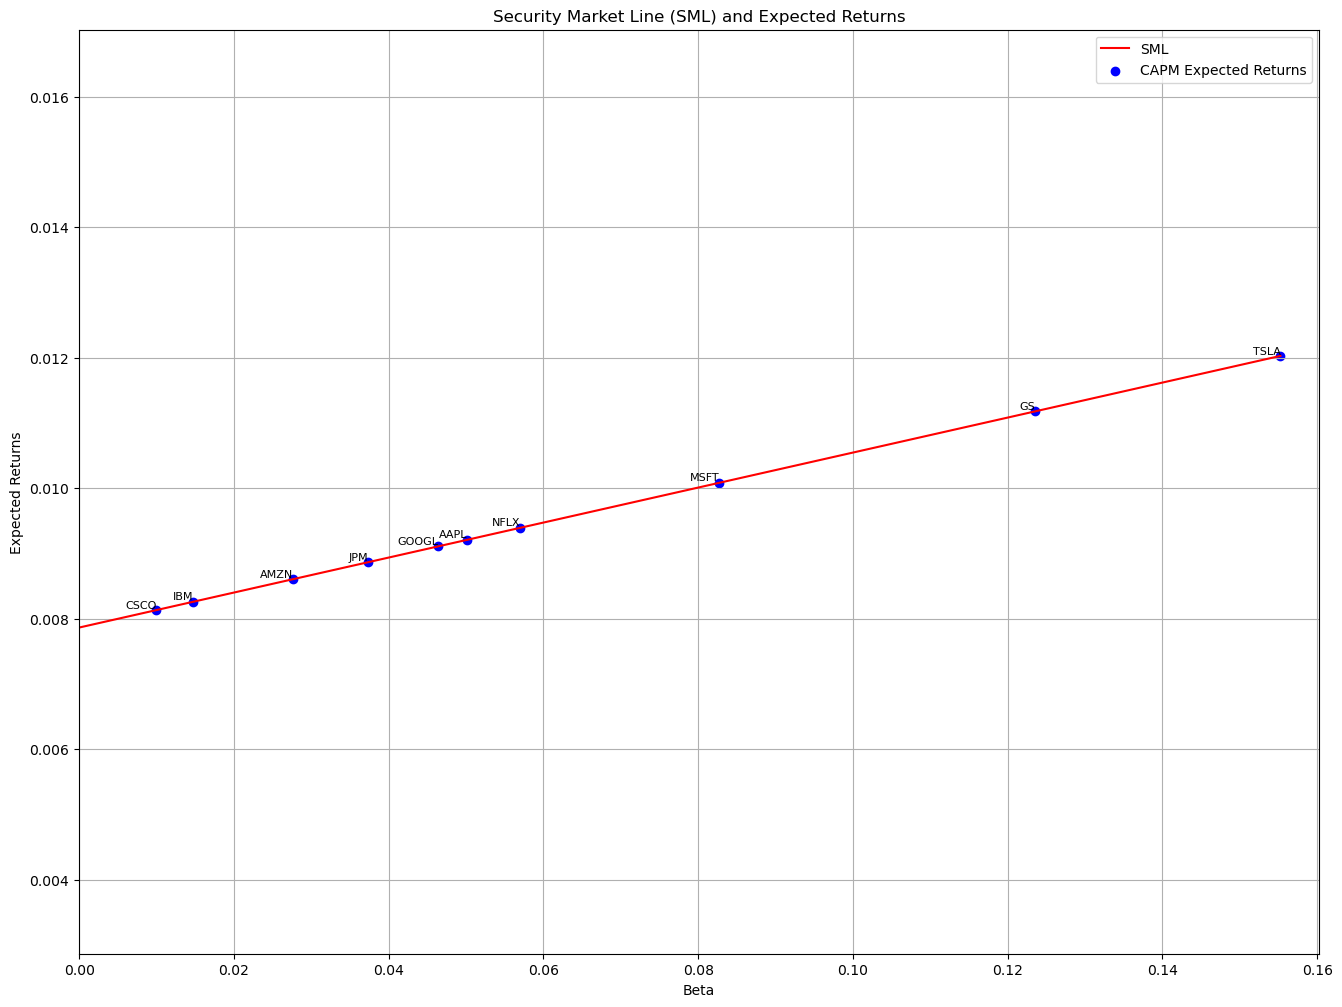

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA', 'JPM', 'GS', 'IBM', 'NFLX', 'CSCO']
start_date = '2020-01-01'
end_date = '2023-01-01'
df_stocks = pd.DataFrame()

for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    df_stocks[ticker] = stock_data['Adj Close']

print(df_stocks.head(15))


df_stocks.plot(figsize=(14, 8))
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12,6))
for ticker in tickers:
    df_stocks[ticker].rolling(window=20).std().plot(label=ticker)
plt.title('Rolling Volatility (20-Day) of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility (20-Day)')
plt.legend(loc='upper left')
plt.show()

stocks_returns = df_stocks.pct_change()
print(stocks_returns)

mean_returns = stocks_returns.mean() * 100
print(mean_returns)

covariance_matrix = stocks_returns.cov()
plt.figure(figsize=(16, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Stock Returns')
plt.show()

# Display the correlation matrix of stock returns
correlation_matrix = stocks_returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Returns')
plt.show()

market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
cov_with_market = df_stocks.apply(lambda x: np.cov(x, market_data)[0, 1])
print(cov_with_market)

betas = cov_with_market / market_data.var()
print(betas)

risk_free_data = yf.download('^IRX', start=start_date, end=end_date)['Adj Close'] / 100
risk_free_rate = risk_free_data.mean()
print(risk_free_rate)

market_return = market_data.pct_change()
average_market_return = market_return.mean() * 100
print(average_market_return)

expected_returns = risk_free_rate + betas * (average_market_return - risk_free_rate)
for i, ticker in enumerate(tickers):
    print(f"Stock: {ticker}")
    print(f"Beta: {betas[i]:.4f}")
    print(f"Expected Return (CAPM): {expected_returns[i]:.4f}\n")

plt.figure(figsize=(12, 6))
plt.bar(range(len(expected_returns)), expected_returns, color='blue')
plt.xticks(range(len(expected_returns)), tickers, rotation='vertical')
plt.title('Expected Returns According to CAPM')
plt.xlabel('Stocks')
plt.ylabel('Expected Returns')
plt.show()

betas_range = np.linspace(0, max(betas), 100)
sml_values = risk_free_rate + betas_range * (average_market_return - risk_free_rate)
plt.figure(figsize=(16, 12))
plt.plot(betas_range, sml_values, color='red', label='SML')
plt.scatter(betas, expected_returns, color='blue', label='CAPM Expected Returns')
plt.xlim(0, max(betas) + 0.005)
plt.ylim(risk_free_rate - 0.005, max(expected_returns) + 0.005)
for i, ticker in enumerate(tickers):
    y_coord = expected_returns[i] + 0.02 if i % 2 == 0 else expected_returns[i] - 0.02
    plt.annotate(ticker, (betas[i], expected_returns[i]), fontsize=8, ha='right', va='bottom')
plt.title('Security Market Line (SML) and Expected Returns')
plt.xlabel('Beta')
plt.ylabel('Expected Returns')
plt.legend()
plt.grid(True)
plt.show()
